# Linear Regression

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as skl_lm

%matplotlib inline
plt.style.use('seaborn-whitegrid')


OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [13]:
# Importing the Advertising dataset
advertising = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# Importing the Credit dataset
credit = pd.read_csv('data/Credit.csv')
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [8]:
# Have a look at the first few rows of the data
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580


In our DataFrame, we have a column named 'Student' which contains two values: 'Yes' and 'No'. A common practice for dealing with such binary variables (<strong>dummy</strong> variables) is to transform the values into 1 when the characteristic is present, and 0 when it is not.

In [6]:
# Mapping the values of the Student column to 0 and 1
credit['Student2'] = credit['Student'].apply(lambda x: 1 if x == 'Yes' else 0)
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance,Student2
0,14.891,3606,283,2,34,11,No,No,Yes,South,333,0
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903,1
2,104.593,7075,514,4,71,11,No,No,No,West,580,0


In [ ]:
# importing the Auto dataset
auto = pd.read_csv('data/Auto.csv')
auto.info()

## Simple Linear Regression
 One of the key strengths of univariate linear regression (which involves only one predictor) is its simplicity in interpretation and ease of graphical representation.

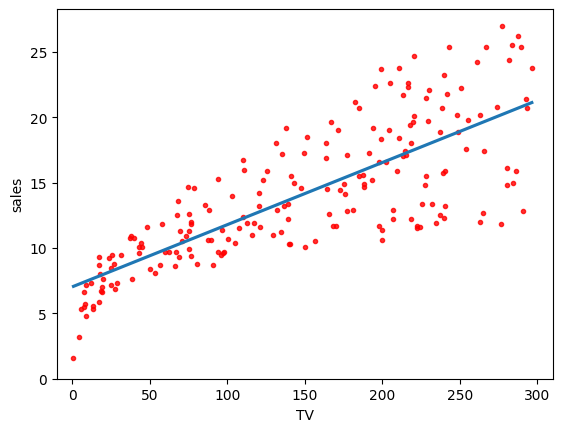

In [18]:
sns.regplot(x=advertising.TV, y=advertising.sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0);

# Parameters estimation
In this section, we will estimate the same parameters using the two most important libraries for this type of analysis:
- statsmodels
- scikit-learn

In [21]:
# Statsmodels
est = smf.ols('sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [27]:
# Manually calculate the error for the first observation
intercept = est.params.iloc[0]
slope = est.params.iloc[1]
first_x_obs = advertising.TV.iloc[0]
first_y_obs = advertising.sales.iloc[0]
first_y_obs_pred = intercept + slope * first_x_obs

print('Intercept:', intercept)
print('Slope:', slope)
print('First observation:', first_x_obs)
print('Predicted value:', first_y_obs_pred)
print('Real value:', first_y_obs)
print('Residual:', first_y_obs - first_y_obs_pred)


Intercept: 7.032593549127695
Slope: 0.047536640433019736
First observation: 230.1
Predicted value: 17.970774512765537
Real value: 22.1
Residual: 4.129225487234464


In [41]:
# Sklearn  (Scikit-learn)
regr = skl_lm.LinearRegression()

X = advertising.TV.values.reshape(-1,1)
y = advertising.sales

# Fit the linear regression
regr.fit(X,y)
new_intercept = regr.intercept_
new_slope = regr.coef_[0]

cond_1 = new_intercept == intercept
cond_2 = round(new_slope, 3) == round(slope, 3)

if cond_1 and cond_2:
    print('The values match')

The values match


# Multiple Linear Regression


In [43]:
# Parameters estimation with statsmodels
est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
radio,0.1885,0.009,21.893,0.000,0.172,0.206
newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


In [ ]:
# Entire summary
est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary()

In [48]:
# Correlation matrix
correlation_matrix = advertising.corr()
correlation_matrix

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


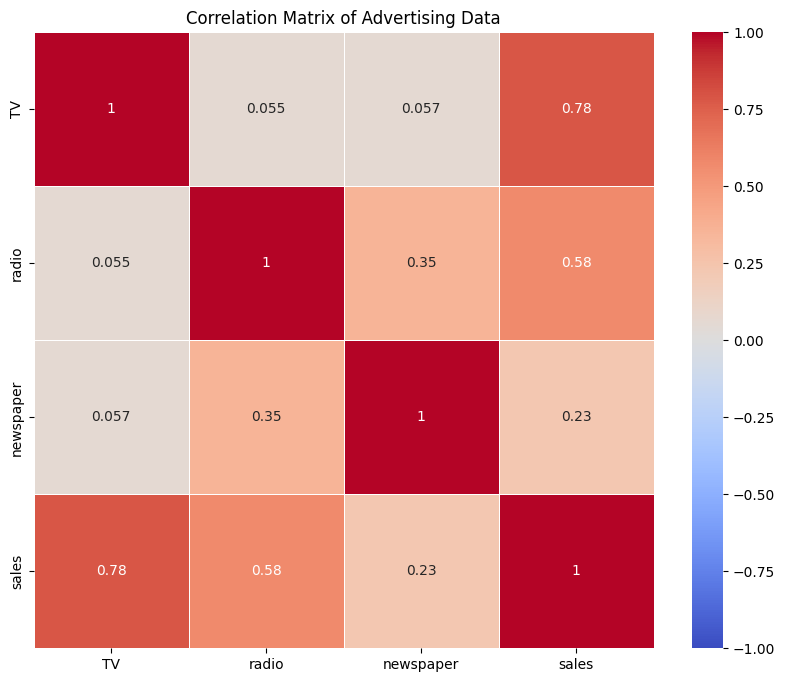

In [72]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Advertising Data')
plt.show()

In [55]:
# Parameters estimation with sklearn
regr = skl_lm.LinearRegression()

X = advertising[['radio', 'TV']]
y = advertising.sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[0.18799423 0.04575482]
2.921099912405138


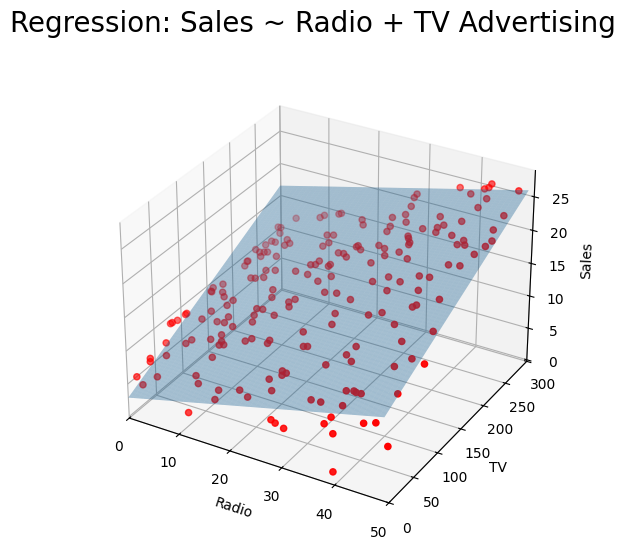

<Figure size 640x480 with 0 Axes>

In [73]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

# Create plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax.plot_surface(B1, B2, Z, rstride=1, cstride=1, alpha=0.4)
ax.scatter(advertising['radio'], advertising['TV'], advertising['sales'], c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0, 50)
ax.set_ylabel('TV')
ax.set_ylim(0, 300)
ax.set_zlabel('Sales')

plt.show()
plt.savefig('images/fig_3d.png')